In [1]:
# J train
# average AM enters / exits

In [1]:
# import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [2]:
# dataframe with all enters/exits
csv_path = 'ts_11_2018_am_tot.csv'
am_commuters_11_2018 = pd.read_csv(csv_path, encoding="utf-8")

am_commuters_11_2018.head()

,STATION,LINENAME,AM_ENTERS,AM_EXITS
0,1 AV,L,2173.0,5427.0
1,103 ST,1,7888.0,1943.0
2,103 ST,6,8439.0,7932.0
3,103 ST,BC,4581.0,1183.0
4,103 ST-CORONA,7,22039.0,1903.0


In [3]:
# look at J line only
J_train_all = am_commuters_11_2018[am_commuters_11_2018['LINENAME'].str.contains('J')]

In [4]:
# look at all station names
J_train_all['STATION'].unique()

array(['104 ST', '111 ST', '121 ST', '75 ST-ELDERTS', '85 ST-FOREST PK',
       'ALABAMA AV', 'BOWERY', 'BROAD ST', 'BROADWAY JCT',
       'BROOKLYN BRIDGE', 'CANAL ST', 'CHAMBERS ST', 'CHAUNCEY ST',
       'CLEVELAND ST', 'CRESCENT ST', 'CYPRESS HILLS', 'DELANCEY/ESSEX',
       'FLUSHING AV', 'FULTON ST', 'GATES AV', 'HALSEY ST', 'HEWES ST',
       'JAMAICA CENTER', 'KOSCIUSZKO ST', 'LORIMER ST', 'MARCY AV',
       'MYRTLE AV', 'NORWOOD AV', 'SUTPHIN-ARCHER', 'VAN SICLEN AV',
       'WOODHAVEN BLVD'], dtype=object)

In [5]:
# check station count
J_train_all['STATION'].count()

32

In [7]:
# needs further cleaning
J_train_all["STATION"].replace("BROOKLYN BRIDGE", value="CHAMBERS ST", inplace=True)

In [9]:
# now sum same name rows
J_commuters = J_train_all.groupby(['STATION'])[['AM_ENTERS','AM_EXITS']].sum()
J_commuters.head()

,AM_ENTERS,AM_EXITS
STATION,,
104 ST,1539.0,35.0
111 ST,2451.0,313.0
121 ST,1251.0,253.0
75 ST-ELDERTS,3857.0,295.0
85 ST-FOREST PK,4103.0,274.0


In [10]:
# order stations in excel
# save as csv
J_commuters.to_csv('J_commuters.csv')

In [11]:
# open ordered CSV
csv_path_J = 'J_commuters_order.csv'
J_commuters_order = pd.read_csv(csv_path_J, encoding="utf-8")
J_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS
0,JAMAICA CENTER,33067,5697
1,SUTPHIN-ARCHER,22381,9521
2,121 ST,1251,253
3,111 ST,2451,313
4,104 ST,1539,35


In [13]:
J_commuters_order['AM_AVG_ENTER'] = J_commuters_order['AM_ENTERS']/5

In [14]:
J_commuters_order['AM_AVG_EXIT'] = J_commuters_order['AM_EXITS']/5
J_commuters_order.head()

,STATION,AM_ENTERS,AM_EXITS,AM_AVG_ENTER,AM_AVG_EXIT
0,JAMAICA CENTER,33067,5697,6613.4,1139.4
1,SUTPHIN-ARCHER,22381,9521,4476.2,1904.2
2,121 ST,1251,253,250.2,50.6
3,111 ST,2451,313,490.2,62.6
4,104 ST,1539,35,307.8,7.0


In [15]:
# order stations in excel
# save as csv
J_commuters_order.to_csv('J_commuters_final.csv')

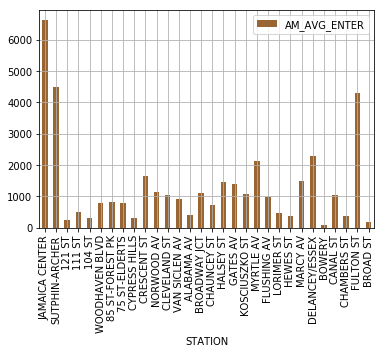

In [16]:
# graph J Train AM AVG ENTERS
plt = J_commuters_order.plot('STATION','AM_AVG_ENTER', kind='bar', color='#996633')
plt.grid()

# save the fig
plt.figure.savefig('J-AM-enter.pdf')

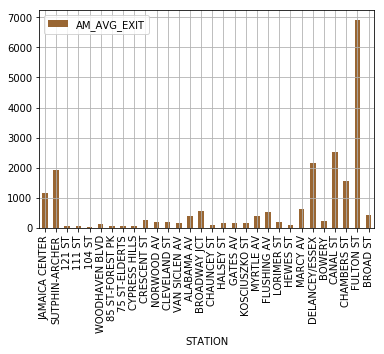

In [17]:
# graph J Train AM AVG EXITS
plt = J_commuters_order.plot('STATION','AM_AVG_EXIT', kind='bar', color='#996633')
plt.grid()

# save the fig
plt.figure.savefig('J-AM-exit.pdf')